In [4]:
from Data_manager.UserUtils import *
from Data_manager.split_functions.split_train_validation_random_holdout import \
    split_train_in_two_percentage_global_sample
URM_all = getURM_all()
URM_train_validation, URM_test = split_train_in_two_percentage_global_sample(URM_all, train_percentage = 0.80)
URM_train, URM_validation = split_train_in_two_percentage_global_sample(URM_train_validation, train_percentage = 0.80)

100%|█████████▉| 22216/22222 [2:49:15<00:02,  2.19it/s]


In [5]:
# SETUP EVALUATORS
from Evaluation.Evaluator import EvaluatorHoldout

evaluator_validation = EvaluatorHoldout(URM_validation, cutoff_list=[10])
evaluator_test = EvaluatorHoldout(URM_test, cutoff_list=[10])

EvaluatorHoldout: Ignoring 2629 (20.8%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 2189 (17.3%) Users that have less than 1 test interactions


In [6]:
from Hybrid import *
from Recommenders.EASE_R.EASE_R_Recommender import EASE_R_Recommender
from Recommenders.KNN.UserKNNCFRecommender import UserKNNCFRecommender
from Recommenders.KNN.ItemKNNCFRecommender import ItemKNNCFRecommender
from Recommenders.SLIM.SLIMElasticNetRecommender import SLIMElasticNetRecommender, MultiThreadSLIM_SLIMElasticNetRecommender
from Recommenders.GraphBased.P3alphaRecommender import P3alphaRecommender
from Recommenders.GraphBased.RP3betaRecommender import RP3betaRecommender
from Recommenders.NonPersonalizedRecommender import TopPop
MAP_recommender_per_group = {}

collaborative_recommender_class = {"UserKNNCF": UserKNNCFRecommender,
                                   "ItemKNNCF": ItemKNNCFRecommender,
                                   "P3alpha": P3alphaRecommender,
                                   "RP3beta": RP3betaRecommender,
                                   "SLIM_ELASTIC": MultiThreadSLIM_SLIMElasticNetRecommender,
                                   # "EASE_R": EASE_R_Recommender,
                                   "TopPop" : TopPop
                                   }
recommender_object_dict = {}

for label, recommender_class in collaborative_recommender_class.items():
    recommender_object = recommender_class(URM_train)
    recommender_object_dict[label] = recommender_object
    
    
recommender_object_dict["SLIM_ELASTIC"].fit(topK=8894, l1_ratio=0.05565733019999427, alpha=0.0012979360257937668, workers=7)
recommender_object_dict["P3alpha"].fit(topK=76, alpha=0.377201600381895, normalize_similarity=True)
recommender_object_dict["RP3beta"].fit(topK=101, alpha=0.3026342852596128, beta=0.058468783118329024)
recommender_object_dict["UserKNNCF"].fit(topK=445, shrink=3, similarity='asymmetric', normalize=True,
                                       feature_weighting='none', asymmetric_alpha=0.402515)

recommender_object_dict["ItemKNNCF"].fit(topK=31, shrink=435, similarity='tversky', normalize=True,
                                       feature_weighting='BM25', tversky_alpha=0.17113169506422393, tversky_beta=0.5684024974085575)
recommender_object_dict["TopPop"].fit()

recommender_object_dict_full_dataset = {}

for label, recommender_class in collaborative_recommender_class.items():
    recommender_object = recommender_class(URM_train_validation)
    recommender_object_dict_full_dataset[label] = recommender_object
    
    
recommender_object_dict_full_dataset["SLIM_ELASTIC"].fit(topK=8894, l1_ratio=0.05565733019999427, alpha=0.0012979360257937668, workers=7)
recommender_object_dict_full_dataset["P3alpha"].fit(topK=76, alpha=0.377201600381895, normalize_similarity=True)
recommender_object_dict_full_dataset["RP3beta"].fit(topK=101, alpha=0.3026342852596128, beta=0.058468783118329024)
recommender_object_dict_full_dataset["UserKNNCF"].fit(topK=445, shrink=3, similarity='asymmetric', normalize=True,
                                       feature_weighting='none', asymmetric_alpha=0.402515)

recommender_object_dict_full_dataset["ItemKNNCF"].fit(topK=31, shrink=435, similarity='tversky', normalize=True,
                                       feature_weighting='BM25', tversky_alpha=0.17113169506422393, tversky_beta=0.5684024974085575)
# recommender_object_dict["EASE_R"].fit(topK=24, l2_norm=37.54323189430143)
recommender_object_dict_full_dataset["TopPop"].fit()


UserKNNCFRecommender: URM Detected 460 ( 3.6%) users with no interactions.
UserKNNCFRecommender: URM Detected 352 ( 1.6%) items with no interactions.
ItemKNNCFRecommender: URM Detected 460 ( 3.6%) users with no interactions.
ItemKNNCFRecommender: URM Detected 352 ( 1.6%) items with no interactions.
P3alphaRecommender: URM Detected 460 ( 3.6%) users with no interactions.
P3alphaRecommender: URM Detected 352 ( 1.6%) items with no interactions.
RP3betaRecommender: URM Detected 460 ( 3.6%) users with no interactions.
RP3betaRecommender: URM Detected 352 ( 1.6%) items with no interactions.
SLIMElasticNetRecommender: URM Detected 460 ( 3.6%) users with no interactions.
SLIMElasticNetRecommender: URM Detected 352 ( 1.6%) items with no interactions.
TopPopRecommender: URM Detected 460 ( 3.6%) users with no interactions.
TopPopRecommender: URM Detected 352 ( 1.6%) items with no interactions.


100%|█████████▉| 22192/22222 [03:13<00:00, 55.36it/s] 

P3alphaRecommender: Similarity column 22222 (100.0%), 4190.26 column/sec. Elapsed time 5.30 sec


100%|█████████▉| 22216/22222 [03:23<00:00, 55.36it/s]

RP3betaRecommender: Similarity column 22222 (100.0%), 2730.41 column/sec. Elapsed time 8.14 sec
Similarity column 12638 (100.0%), 6452.48 column/sec. Elapsed time 1.96 sec
Similarity column 22222 (100.0%), 5390.34 column/sec. Elapsed time 4.12 sec
UserKNNCFRecommender: URM Detected 224 ( 1.8%) users with no interactions.
UserKNNCFRecommender: URM Detected 134 ( 0.6%) items with no interactions.
ItemKNNCFRecommender: URM Detected 224 ( 1.8%) users with no interactions.
ItemKNNCFRecommender: URM Detected 134 ( 0.6%) items with no interactions.
P3alphaRecommender: URM Detected 224 ( 1.8%) users with no interactions.
P3alphaRecommender: URM Detected 134 ( 0.6%) items with no interactions.
RP3betaRecommender: URM Detected 224 ( 1.8%) users with no interactions.
RP3betaRecommender: URM Detected 134 ( 0.6%) items with no interactions.
SLIMElasticNetRecommender: URM Detected 224 ( 1.8%) users with no interactions.
SLIMElasticNetRecommender: URM Detected 134 ( 0.6%) items with no interactions.



100%|█████████▉| 22192/22222 [03:12<00:00, 92.81it/s]

P3alphaRecommender: Similarity column 22222 (100.0%), 3895.40 column/sec. Elapsed time 5.70 sec



100%|█████████▉| 22216/22222 [03:26<00:00, 92.81it/s]

RP3betaRecommender: Similarity column 22222 (100.0%), 2638.45 column/sec. Elapsed time 8.42 sec
Similarity column 12638 (100.0%), 5299.10 column/sec. Elapsed time 2.38 sec
Similarity column 22222 (100.0%), 4965.40 column/sec. Elapsed time 4.48 sec


# Recommender for cold users, cold items and warm users

In [ ]:
from Recommenders.NonPersonalizedRecommender import TopPop
from Recommenders.KNN.ItemKNNCBFRecommender import ItemKNNCBFRecommender
from Recommenders.KNN.ItemKNNCBFRecommender import ItemKNNCBFRecommender

# build the recommender object
recommender_object_dict_cold = {}
recommender_object_dict_cold["TopPop"] = TopPop(URM_train)
recommender_object_dict_cold["ItemKNNCBF"] = ItemKNNCBFRecommender(URM_train, ICM_all)
recommender_object_dict_cold["ItemKNNCBF"].fit(topK=10, shrink=0, similarity='cosine', normalize=True,
                                       feature_weighting='none')

# XGBOOST

In [36]:
import  Recommenders.XGBoostEnsemble as XgBoostEnsembler
from importlib import reload
reload(XgBoostEnsembler)

model = XgBoostEnsembler.XgBoostEnsembler(URM_train, URM_val=URM_validation, recommenders=recommender_object_dict, internal_cutoff_xgboost=100)
model.fit()

XgBoostEnsembler: URM Detected 471 ( 3.7%) users with no interactions.
XgBoostEnsembler: URM Detected 317 ( 1.4%) items with no interactions.


100%|██████████| 6/6 [03:37<00:00, 36.30s/it]


[0]	validation_0-map@10:0.53201	validation_1-map@10:0.54175


/home/federico/Documents/projects/rec-sys/RecSys-2023-polimi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/federico/Documents/projects/rec-sys/RecSys-2023-polimi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-map@10:0.55427	validation_1-map@10:0.56222
[2]	validation_0-map@10:0.55839	validation_1-map@10:0.56398
[3]	validation_0-map@10:0.55969	validation_1-map@10:0.56678
[4]	validation_0-map@10:0.56056	validation_1-map@10:0.56668
[5]	validation_0-map@10:0.56096	validation_1-map@10:0.56555
[6]	validation_0-map@10:0.56121	validation_1-map@10:0.56589
[7]	validation_0-map@10:0.56111	validation_1-map@10:0.56561
[8]	validation_0-map@10:0.56152	validation_1-map@10:0.56722
[9]	validation_0-map@10:0.56154	validation_1-map@10:0.56784
[10]	validation_0-map@10:0.56193	validation_1-map@10:0.56748
[11]	validation_0-map@10:0.56236	validation_1-map@10:0.56769
[12]	validation_0-map@10:0.56251	validation_1-map@10:0.56780
[13]	validation_0-map@10:0.56284	validation_1-map@10:0.56837
[14]	validation_0-map@10:0.56356	validation_1-map@10:0.56868
[15]	validation_0-map@10:0.56406	validation_1-map@10:0.56840
[16]	validation_0-map@10:0.56404	validation_1-map@10:0.56834
[17]	validation_0-map@10:0.56382	

XgBoostEnsembler: URM Detected 471 ( 3.7%) users with no interactions.
XgBoostEnsembler: URM Detected 317 ( 1.4%) items with no interactions.
[0]	validation_0-map@10:0.53201	validation_1-map@10:0.54175


/home/federico/Documents/projects/rec-sys/RecSys-2023-polimi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/federico/Documents/projects/rec-sys/RecSys-2023-polimi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-map@10:0.55427	validation_1-map@10:0.56222
[2]	validation_0-map@10:0.55839	validation_1-map@10:0.56398
[3]	validation_0-map@10:0.55969	validation_1-map@10:0.56678
[4]	validation_0-map@10:0.56056	validation_1-map@10:0.56668
[5]	validation_0-map@10:0.56096	validation_1-map@10:0.56555
[6]	validation_0-map@10:0.56121	validation_1-map@10:0.56589
[7]	validation_0-map@10:0.56111	validation_1-map@10:0.56561
[8]	validation_0-map@10:0.56152	validation_1-map@10:0.56722
[9]	validation_0-map@10:0.56154	validation_1-map@10:0.56784
[10]	validation_0-map@10:0.56193	validation_1-map@10:0.56748
[11]	validation_0-map@10:0.56236	validation_1-map@10:0.56769
[12]	validation_0-map@10:0.56251	validation_1-map@10:0.56780
[13]	validation_0-map@10:0.56284	validation_1-map@10:0.56837
[14]	validation_0-map@10:0.56356	validation_1-map@10:0.56868
[15]	validation_0-map@10:0.56406	validation_1-map@10:0.56840
[16]	validation_0-map@10:0.56404	validation_1-map@10:0.56834
[17]	validation_0-map@10:0.56382	

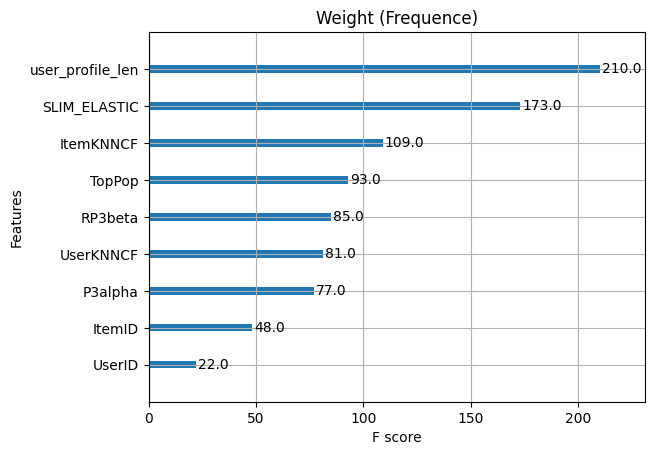

In [41]:
reload(XgBoostEnsembler)
model2 = XgBoostEnsembler.XgBoostEnsembler(URM_train, URM_val=URM_validation, recommenders=recommender_object_dict_full_dataset, internal_cutoff_xgboost=100)
model2.training_dataframe = model.training_dataframe

model2.fit(prepare_training_df=False, plot=True)


In [42]:
evaluator_test.evaluateRecommender(model2)

100%|██████████| 486/486 [00:00<00:00, 631.54it/s]


EvaluatorHoldout: Processed 10486 (100.0%) in 1.25 min. Users per second: 139


(       PRECISION PRECISION_RECALL_MIN_DEN    RECALL       MAP MAP_MIN_DEN  \
 cutoff                                                                      
 10      0.097788                 0.169288  0.142739  0.049146    0.083222   
 
              MRR     NDCG        F1  HIT_RATE ARHR_ALL_HITS  ...  \
 cutoff                                                       ...   
 10      0.270577  0.15194  0.116063  0.532329      0.359947  ...   
 
        COVERAGE_USER COVERAGE_USER_HIT USERS_IN_GT DIVERSITY_GINI  \
 cutoff                                                              
 10           0.82972          0.441684     0.82972       0.051305   
 
        SHANNON_ENTROPY RATIO_DIVERSITY_HERFINDAHL RATIO_DIVERSITY_GINI  \
 cutoff                                                                   
 10           10.048563                   0.997356             0.149177   
 
        RATIO_SHANNON_ENTROPY RATIO_AVERAGE_POPULARITY RATIO_NOVELTY  
 cutoff                                      

In [7]:
evaluator_test.evaluateRecommender(recommender_object_dict_full_dataset["SLIM_ELASTIC"])

EvaluatorHoldout: Processed 10486 (100.0%) in 7.45 sec. Users per second: 1407


(       PRECISION PRECISION_RECALL_MIN_DEN    RECALL     MAP MAP_MIN_DEN  \
 cutoff                                                                    
 10       0.09506                 0.162027  0.136183  0.0494    0.082961   
 
              MRR      NDCG        F1  HIT_RATE ARHR_ALL_HITS  ...  \
 cutoff                                                        ...   
 10      0.276278  0.150245  0.111965  0.521839      0.365416  ...   
 
        COVERAGE_USER COVERAGE_USER_HIT USERS_IN_GT DIVERSITY_GINI  \
 cutoff                                                              
 10           0.82972           0.43298     0.82972       0.054717   
 
        SHANNON_ENTROPY RATIO_DIVERSITY_HERFINDAHL RATIO_DIVERSITY_GINI  \
 cutoff                                                                   
 10           10.185598                   0.997695             0.156882   
 
        RATIO_SHANNON_ENTROPY RATIO_AVERAGE_POPULARITY RATIO_NOVELTY  
 cutoff                                         

In [23]:
reload(XgBoostEnsembler)
model2 = XgBoostEnsembler.XgBoostEnsembler(URM_train, URM_val=URM_validation, recommenders=recommender_object_dict)
model2.XGB_model = model.XGB_model

XgBoostEnsembler: URM Detected 471 ( 3.7%) users with no interactions.
XgBoostEnsembler: URM Detected 317 ( 1.4%) items with no interactions.


In [35]:
uid = 10
model2.recommend(uid, cutoff=10)

100%|██████████| 1/1 [00:00<00:00, 101.75it/s]


KeyboardInterrupt: 

In [33]:
recommender_object_dict_full_dataset["SLIM_ELASTIC"].recommend(uid, cutoff=10)

[121, 453, 321, 347, 1172, 228, 452, 319, 318, 1088]